# 奧運會資料分析

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyecharts.charts import *
from pyecharts import options as opts
from pyecharts.commons.utils import JsCode
from scipy.stats import gaussian_kde
from pyecharts.render import make_snapshot
from snapshot_pyppeteer import snapshot

plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']

# 讀取運動員資料和國家地區資料
athlete_data = pd.read_csv('../dataset/clean/summerOlyData/summerOly_athlete_data_v3.csv')
noc_data = pd.read_csv('../dataset/raw/kaggle/archive/noc_regions.csv')

# 數據清洗

In [2]:
# 查看運動員資料的前五行
athlete_data.head(5)

,ID,ID_1,Name,Sex,Age,Birth,Height,Weight,Team,NOC,Year,City,Sport,Event,Medal,Season
0,1,237674,Artur Aleksanyan,M,NaN,NaN,NaN,NaN,Armenia,ARM,2024,Paris,Wrestling,Men's Greco-Roman 97kg,Silver,Summer
1,2,237675,Malkhas Amoyan,M,NaN,NaN,NaN,NaN,Armenia,ARM,2024,Paris,Wrestling,Men's Greco-Roman 77kg,Bronze,Summer
2,3,237676,Slavik Galstyan,M,NaN,NaN,NaN,NaN,Armenia,ARM,2024,Paris,Wrestling,Men's Greco-Roman 67kg,No medal,Summer
3,4,237677,Arsen Harutyunyan,M,NaN,NaN,NaN,NaN,Armenia,ARM,2024,Paris,Wrestling,Men's Freestyle 57kg,No medal,Summer
4,5,237678,Vazgen Tevanyan,M,NaN,NaN,NaN,NaN,Armenia,ARM,2024,Paris,Wrestling,Men's Freestyle 65kg,No medal,Summer


In [3]:
# 查看國家地區資料的前五行
noc_data.head(5)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [4]:
# 合併運動員資料和國家地區資料
df=pd.merge(athlete_data,noc_data, on='NOC',how='left')
df.head()

,ID,ID_1,Name,Sex,Age,Birth,Height,Weight,Team,NOC,Year,City,Sport,Event,Medal,Season,region,notes
0,1,237674,Artur Aleksanyan,M,NaN,NaN,NaN,NaN,Armenia,ARM,2024,Paris,Wrestling,Men's Greco-Roman 97kg,Silver,Summer,Armenia,NaN
1,2,237675,Malkhas Amoyan,M,NaN,NaN,NaN,NaN,Armenia,ARM,2024,Paris,Wrestling,Men's Greco-Roman 77kg,Bronze,Summer,Armenia,NaN
2,3,237676,Slavik Galstyan,M,NaN,NaN,NaN,NaN,Armenia,ARM,2024,Paris,Wrestling,Men's Greco-Roman 67kg,No medal,Summer,Armenia,NaN
3,4,237677,Arsen Harutyunyan,M,NaN,NaN,NaN,NaN,Armenia,ARM,2024,Paris,Wrestling,Men's Freestyle 57kg,No medal,Summer,Armenia,NaN
4,5,237678,Vazgen Tevanyan,M,NaN,NaN,NaN,NaN,Armenia,ARM,2024,Paris,Wrestling,Men's Freestyle 65kg,No medal,Summer,Armenia,NaN


In [5]:
# 刪除重複值，保留最後一個值
df.drop_duplicates()

,ID,ID_1,Name,Sex,Age,Birth,Height,Weight,Team,NOC,Year,City,Sport,Event,Medal,Season,region,notes
0,1,237674,Artur Aleksanyan,M,NaN,NaN,NaN,NaN,Armenia,ARM,2024,Paris,Wrestling,Men's Greco-Roman 97kg,Silver,Summer,Armenia,NaN
1,2,237675,Malkhas Amoyan,M,NaN,NaN,NaN,NaN,Armenia,ARM,2024,Paris,Wrestling,Men's Greco-Roman 77kg,Bronze,Summer,Armenia,NaN
2,3,237676,Slavik Galstyan,M,NaN,NaN,NaN,NaN,Armenia,ARM,2024,Paris,Wrestling,Men's Greco-Roman 67kg,No medal,Summer,Armenia,NaN
3,4,237677,Arsen Harutyunyan,M,NaN,NaN,NaN,NaN,Armenia,ARM,2024,Paris,Wrestling,Men's Freestyle 57kg,No medal,Summer,Armenia,NaN
4,5,237678,Vazgen Tevanyan,M,NaN,NaN,NaN,NaN,Armenia,ARM,2024,Paris,Wrestling,Men's Freestyle 65kg,No medal,Summer,Armenia,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252560,252561,376,Khristos Zoumis,M,NaN,NaN,NaN,NaN,Greece,GRE,1896,Athina,Athletics,Athletics Men's Triple Jump,No medal,Summer,Greece,NaN
252561,252562,377,Jules Zutter,M,30.0,1866.0,NaN,NaN,Switzerland,SUI,1896,Athina,Gymnastics,Gymnastics Men's Horse Vault,Silver,Summer,Switzerland,NaN
252562,252563,378,Jules Zutter,M,30.0,1866.0,NaN,NaN,Switzerland,SUI,1896,Athina,Gymnastics,Gymnastics Men's Parallel Bars,Silver,Summer,Switzerland,NaN
252563,252564,379,Jules Zutter,M,30.0,1866.0,NaN,NaN,Switzerland,SUI,1896,Athina,Gymnastics,Gymnastics Men's Horizontal Bar,No medal,Summer,Switzerland,NaN


In [6]:
# 查看資料的基本資訊
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252565 entries, 0 to 252564
Data columns (total 18 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      252565 non-null  int64  
 1   ID_1    252565 non-null  int64  
 2   Name    252565 non-null  object 
 3   Sex     252565 non-null  object 
 4   Age     228158 non-null  float64
 5   Birth   227944 non-null  float64
 6   Height  176391 non-null  float64
 7   Weight  168517 non-null  float64
 8   Team    252565 non-null  object 
 9   NOC     252565 non-null  object 
 10  Year    252565 non-null  int64  
 11  City    252565 non-null  object 
 12  Sport   252565 non-null  object 
 13  Event   252565 non-null  object 
 14  Medal   252565 non-null  object 
 15  Season  252565 non-null  object 
 16  region  251426 non-null  object 
 17  notes   4614 non-null    object 
dtypes: float64(4), int64(3), object(11)
memory usage: 36.6+ MB


In [7]:
# 查看每列的缺失值數量
df.isnull().sum()

ID             0
ID_1           0
Name           0
Sex            0
Age        24407
Birth      24621
Height     76174
Weight     84048
Team           0
NOC            0
Year           0
City           0
Sport          0
Event          0
Medal          0
Season         0
region      1139
notes     247951
dtype: int64

## 身高缺失值填充

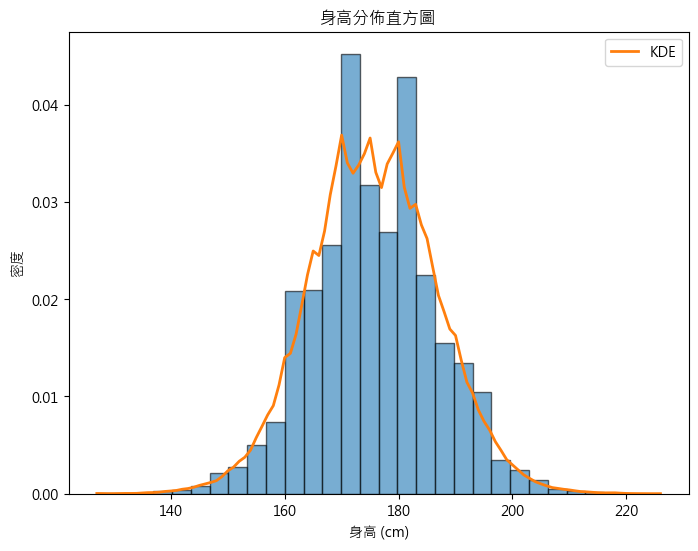

In [8]:
# 繪製身高分佈長條圖
# sns.distplot(df["Height"], kde=True)


# 提取身高數據，去除 NaN
height_data = df["Height"].dropna()

# 繪製直方圖
plt.figure(figsize=(8, 6))
plt.hist(height_data, bins=30, density=True, alpha=0.6, edgecolor='black')

# 繪製 KDE 曲線（平滑密度估計）
kde = gaussian_kde(height_data)
x_vals = np.linspace(min(height_data), max(height_data), 100)
plt.plot(x_vals, kde(x_vals), linestyle='-', linewidth=2, label="KDE")

# 添加標題與標籤
plt.title("身高分佈直方圖")
plt.xlabel("身高 (cm)")
plt.ylabel("密度")
plt.legend()

<Axes: ylabel='Height'>

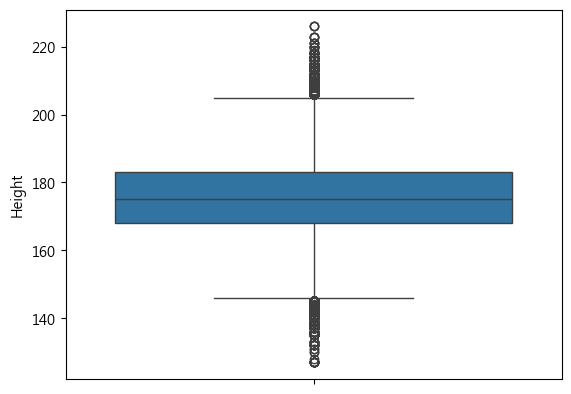

In [9]:
# 繪製身高箱線圖
sns.boxplot(df["Height"])

In [10]:
# 查看身高大於200的運動員
df[df.Height>200].sort_values(by='Age',ascending=False)

,ID,ID_1,Name,Sex,Age,Birth,Height,Weight,Team,NOC,Year,City,Sport,Event,Medal,Season,region,notes
227883,227884,24343,Alfred Labouchere,M,61.0,1867.0,201.0,NaN,Netherlands,NED,1928,Amsterdam,Fencing,"Fencing Men's epee, Team",No medal,Summer,Netherlands,NaN
22849,22850,230510,Ben Maher,M,54.0,1988.0,202.0,NaN,Great Britain,GBR,2020,Tokyo,Equestrian,Jumping Individual,Gold,Summer,UK,NaN
22848,22849,230509,Ben Maher,M,54.0,1988.0,202.0,NaN,Great Britain,GBR,2020,Tokyo,Equestrian,Jumping Team,No medal,Summer,UK,NaN
22118,22119,229779,Jr Larocca,M,51.0,1992.0,206.0,NaN,Argentina,ARG,2020,Tokyo,Equestrian,Jumping Team,No medal,Summer,Argentina,NaN
22119,22120,229780,Jr Larocca,M,51.0,1992.0,206.0,NaN,Argentina,ARG,2020,Tokyo,Equestrian,Jumping Individual,No medal,Summer,Argentina,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109070,109071,152882,Mariya Stepanova,F,17.0,1979.0,202.0,85.0,Russia,RUS,1996,Atlanta,Basketball,Basketball Women's Basketball,No medal,Summer,Russia,NaN
18401,18402,226062,Anna Egorova,F,16.0,1995.0,209.0,NaN,Russia,ROC,2020,Tokyo,Swimming,Women's 4 x 200m Freestyle Relay Team,No medal,Summer,NaN,NaN
83295,83296,181972,Yi Jianlian,M,16.0,1988.0,213.0,113.0,China,CHN,2004,Athina,Basketball,Basketball Men's Basketball,No medal,Summer,China,NaN
18399,18400,226060,Anna Egorova,F,16.0,1995.0,209.0,NaN,Russia,ROC,2020,Tokyo,Swimming,Women's 400m Freestyle,No medal,Summer,NaN,NaN


In [11]:
# 查看身高小於130的運動員
df[df.Height<130].sort_values(by='Age',ascending=False)

,ID,ID_1,Name,Sex,Age,Birth,Height,Weight,Team,NOC,Year,City,Sport,Event,Medal,Season,region,notes
19554,19555,227215,Adosinda Gramane,F,27.0,2004.0,127.0,NaN,Mozambique,MOZ,2020,Tokyo,Boxing,Women's Middle (69-75kg),No medal,Summer,Mozambique,NaN
22779,22780,230440,Armando Machava,M,25.0,2004.0,127.0,NaN,Mozambique,MOZ,2020,Tokyo,Athletics,Men's 400m Hurdles,No medal,Summer,Mozambique,NaN
131687,131688,123728,Lyton Mphande,M,25.0,1963.0,127.0,62.0,Malawi,MAW,1988,Seoul,Boxing,Boxing Men's Light-Welterweight,No medal,Summer,Malawi,NaN
132442,132443,124483,Helman Palije,M,21.0,1967.0,128.0,74.0,Malawi,MAW,1988,Seoul,Boxing,Boxing Men's Middleweight,No medal,Summer,Malawi,NaN
22780,22781,230441,Maria Machava,F,16.0,2004.0,127.0,NaN,Mozambique,MOZ,2020,Tokyo,Sailing,Women's Two Person Dinghy - 470 Team,No medal,Summer,Mozambique,NaN
25025,25026,232686,Denise Parruque,F,16.0,2004.0,127.0,NaN,Mozambique,MOZ,2020,Tokyo,Sailing,Women's Two Person Dinghy - 470 Team,No medal,Summer,Mozambique,NaN
172863,172864,73099,Rosario Briones,F,15.0,1953.0,127.0,42.0,Mexico,MEX,1968,Mexico City,Gymnastics,Gymnastics Women's Individual All-Around,No medal,Summer,Mexico,NaN
172864,172865,73100,Rosario Briones,F,15.0,1953.0,127.0,42.0,Mexico,MEX,1968,Mexico City,Gymnastics,Gymnastics Women's Team All-Around,No medal,Summer,Mexico,NaN
172865,172866,73101,Rosario Briones,F,15.0,1953.0,127.0,42.0,Mexico,MEX,1968,Mexico City,Gymnastics,Gymnastics Women's Floor Exercise,No medal,Summer,Mexico,NaN
172866,172867,73102,Rosario Briones,F,15.0,1953.0,127.0,42.0,Mexico,MEX,1968,Mexico City,Gymnastics,Gymnastics Women's Horse Vault,No medal,Summer,Mexico,NaN


In [12]:
# 使用性別和運動項目的平均身高填充缺失值
df['Height'].fillna(df.groupby(['Sex','Sport'])['Height'].transform('mean'),inplace=True)

In [13]:
# 查看剩餘的缺失值數量
df.isnull().sum()

ID             0
ID_1           0
Name           0
Sex            0
Age        24407
Birth      24621
Height       177
Weight     84048
Team           0
NOC            0
Year           0
City           0
Sport          0
Event          0
Medal          0
Season         0
region      1139
notes     247951
dtype: int64

In [14]:
# 使用性別的平均身高填充剩餘的缺失值
df['Height'].fillna(df.groupby(['Sex'])['Height'].transform('mean'),inplace=True)

In [15]:
# 再次查看剩餘的缺失值數量
df.isnull().sum()

ID             0
ID_1           0
Name           0
Sex            0
Age        24407
Birth      24621
Height         0
Weight     84048
Team           0
NOC            0
Year           0
City           0
Sport          0
Event          0
Medal          0
Season         0
region      1139
notes     247951
dtype: int64

## 體重缺失值填充

C:\Users\User\AppData\Local\Temp\ipykernel_66680\3871309153.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Weight"], kde=True)


<Axes: xlabel='Weight', ylabel='Density'>

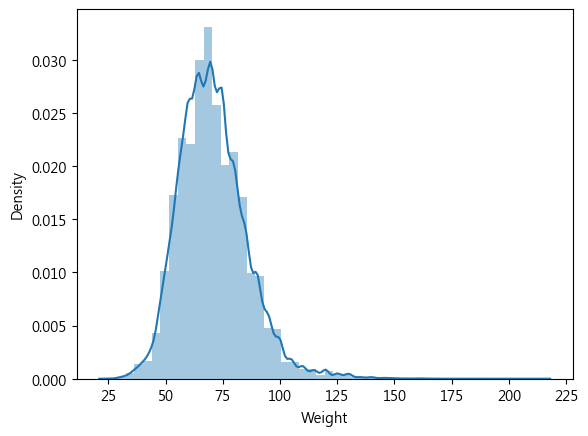

In [16]:
# 繪製體重分佈長條圖
sns.distplot(df["Weight"], kde=True)

<Axes: ylabel='Weight'>

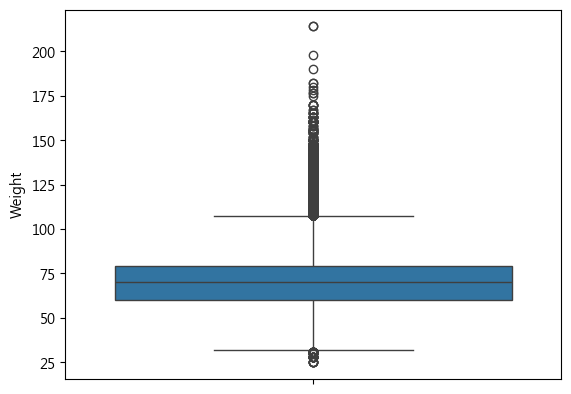

In [17]:
# 繪製體重箱線圖
sns.boxplot(df["Weight"])

In [18]:
# 查看體重大於200的運動員
df[df.Weight>200].sort_values(by='Age',ascending=False)

,ID,ID_1,Name,Sex,Age,Birth,Height,Weight,Team,NOC,Year,City,Sport,Event,Medal,Season,region,notes
44850,44851,197094,Ricardo Jr.,M,25.0,1987.0,183.0,214.0,Guam,GUM,2012,London,Judo,Judo Men's Heavyweight,No medal,Summer,Guam,NaN
57797,57798,183519,Ricardo Jr.,M,21.0,1987.0,183.0,214.0,Guam,GUM,2008,Beijing,Judo,Judo Men's Heavyweight,No medal,Summer,Guam,NaN


In [19]:
# 使用性別和運動項目的中位數體重填充缺失值
df['Weight'].fillna(df.groupby(['Sex', 'Sport'])['Weight'].transform('median'),inplace=True)

In [20]:
# 查看剩餘的缺失值數量
df.isnull().sum()

ID             0
ID_1           0
Name           0
Sex            0
Age        24407
Birth      24621
Height         0
Weight      7705
Team           0
NOC            0
Year           0
City           0
Sport          0
Event          0
Medal          0
Season         0
region      1139
notes     247951
dtype: int64

In [21]:
# 使用性別的中位數體重填充剩餘的缺失值
df['Weight'].fillna(df.groupby(['Sex'])['Weight'].transform('median'),inplace=True)

In [22]:
# 再次查看剩餘的缺失值數量
df.isnull().sum()

ID             0
ID_1           0
Name           0
Sex            0
Age        24407
Birth      24621
Height         0
Weight         0
Team           0
NOC            0
Year           0
City           0
Sport          0
Event          0
Medal          0
Season         0
region      1139
notes     247951
dtype: int64

## 年齡缺失值填充

C:\Users\User\AppData\Local\Temp\ipykernel_66680\487102735.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"], kde=True)


<Axes: xlabel='Age', ylabel='Density'>

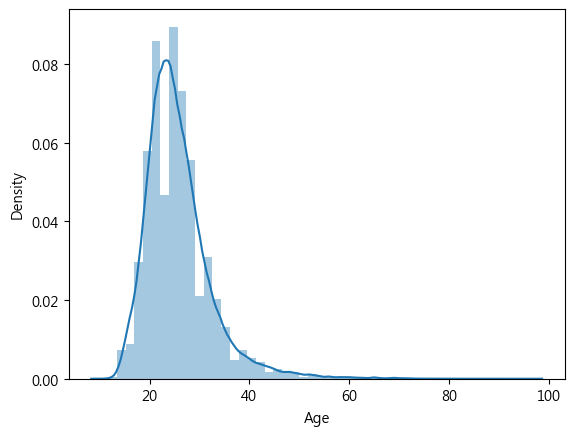

In [23]:
# 繪製年齡分佈長條圖
sns.distplot(df["Age"], kde=True)

由於年齡分佈圖右偏，檢查是否有異常值

<Axes: ylabel='Age'>

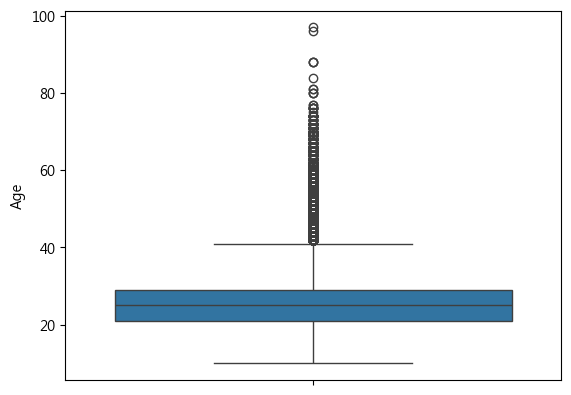

In [24]:
# 繪製年齡箱線圖
sns.boxplot(df["Age"])

發現有很多記錄的年齡超過最大範圍，大約40歲左右，查看這些記錄

In [25]:
# 查看年齡大於60歲的運動員
df[df.Age>60].sort_values(by='Age',ascending=False)

,ID,ID_1,Name,Sex,Age,Birth,Height,Weight,Team,NOC,Year,City,Sport,Event,Medal,Season,region,notes
230313,230314,26773,John Ward,M,97.0,1831.0,174.368421,76.0,United States,USA,1928,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",No medal,Summer,USA,NaN
223805,223806,28226,Winslow Homer,M,96.0,1836.0,174.368421,76.0,United States,USA,1932,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",No medal,Summer,USA,NaN
223305,223306,27726,Thomas Eakins,M,88.0,1844.0,174.368421,76.0,United States,USA,1932,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",No medal,Summer,USA,NaN
223306,223307,27727,Thomas Eakins,M,88.0,1844.0,174.368421,76.0,United States,USA,1932,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",No medal,Summer,USA,NaN
223304,223305,27725,Thomas Eakins,M,88.0,1844.0,174.368421,76.0,United States,USA,1932,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",No medal,Summer,USA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222706,222707,27127,Lewis Baumer,M,61.0,1871.0,174.368421,76.0,Great Britain,GBR,1932,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",No medal,Summer,UK,NaN
222705,222706,27126,Lewis Baumer,M,61.0,1871.0,174.368421,76.0,Great Britain,GBR,1932,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",No medal,Summer,UK,NaN
214169,214170,40976,Charles Pledge,M,61.0,1887.0,174.368421,76.0,Great Britain,GBR,1948,London,Art Competitions,"Art Competitions Mixed Architecture, Unknown E...",No medal,Summer,UK,NaN
227883,227884,24343,Alfred Labouchere,M,61.0,1867.0,201.000000,75.0,Netherlands,NED,1928,Amsterdam,Fencing,"Fencing Men's epee, Team",No medal,Summer,Netherlands,NaN


In [26]:
# 查看年齡的中位數
df["Age"].median()

25.0

In [27]:
# 使用年齡的中位數填充缺失值
df['Age'].fillna(df.Age.median(),inplace=True)

In [28]:
# 再次查看剩餘的缺失值數量
df.isnull().sum()

ID             0
ID_1           0
Name           0
Sex            0
Age            0
Birth      24621
Height         0
Weight         0
Team           0
NOC            0
Year           0
City           0
Sport          0
Event          0
Medal          0
Season         0
region      1139
notes     247951
dtype: int64

In [29]:
# 查看處理後的資料
df

,ID,ID_1,Name,Sex,Age,Birth,Height,Weight,Team,NOC,Year,City,Sport,Event,Medal,Season,region,notes
0,1,237674,Artur Aleksanyan,M,25.0,NaN,172.998228,74.0,Armenia,ARM,2024,Paris,Wrestling,Men's Greco-Roman 97kg,Silver,Summer,Armenia,NaN
1,2,237675,Malkhas Amoyan,M,25.0,NaN,172.998228,74.0,Armenia,ARM,2024,Paris,Wrestling,Men's Greco-Roman 77kg,Bronze,Summer,Armenia,NaN
2,3,237676,Slavik Galstyan,M,25.0,NaN,172.998228,74.0,Armenia,ARM,2024,Paris,Wrestling,Men's Greco-Roman 67kg,No medal,Summer,Armenia,NaN
3,4,237677,Arsen Harutyunyan,M,25.0,NaN,172.998228,74.0,Armenia,ARM,2024,Paris,Wrestling,Men's Freestyle 57kg,No medal,Summer,Armenia,NaN
4,5,237678,Vazgen Tevanyan,M,25.0,NaN,172.998228,74.0,Armenia,ARM,2024,Paris,Wrestling,Men's Freestyle 65kg,No medal,Summer,Armenia,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252560,252561,376,Khristos Zoumis,M,25.0,NaN,179.744827,71.0,Greece,GRE,1896,Athina,Athletics,Athletics Men's Triple Jump,No medal,Summer,Greece,NaN
252561,252562,377,Jules Zutter,M,30.0,1866.0,167.633231,63.5,Switzerland,SUI,1896,Athina,Gymnastics,Gymnastics Men's Horse Vault,Silver,Summer,Switzerland,NaN
252562,252563,378,Jules Zutter,M,30.0,1866.0,167.633231,63.5,Switzerland,SUI,1896,Athina,Gymnastics,Gymnastics Men's Parallel Bars,Silver,Summer,Switzerland,NaN
252563,252564,379,Jules Zutter,M,30.0,1866.0,167.633231,63.5,Switzerland,SUI,1896,Athina,Gymnastics,Gymnastics Men's Horizontal Bar,No medal,Summer,Switzerland,NaN


# 分析

現在身高和體重的缺失值已經填充完畢，但年齡仍有很多缺失值

## 奧運會參賽人數變化

Text(0, 0.5, '參賽人數')

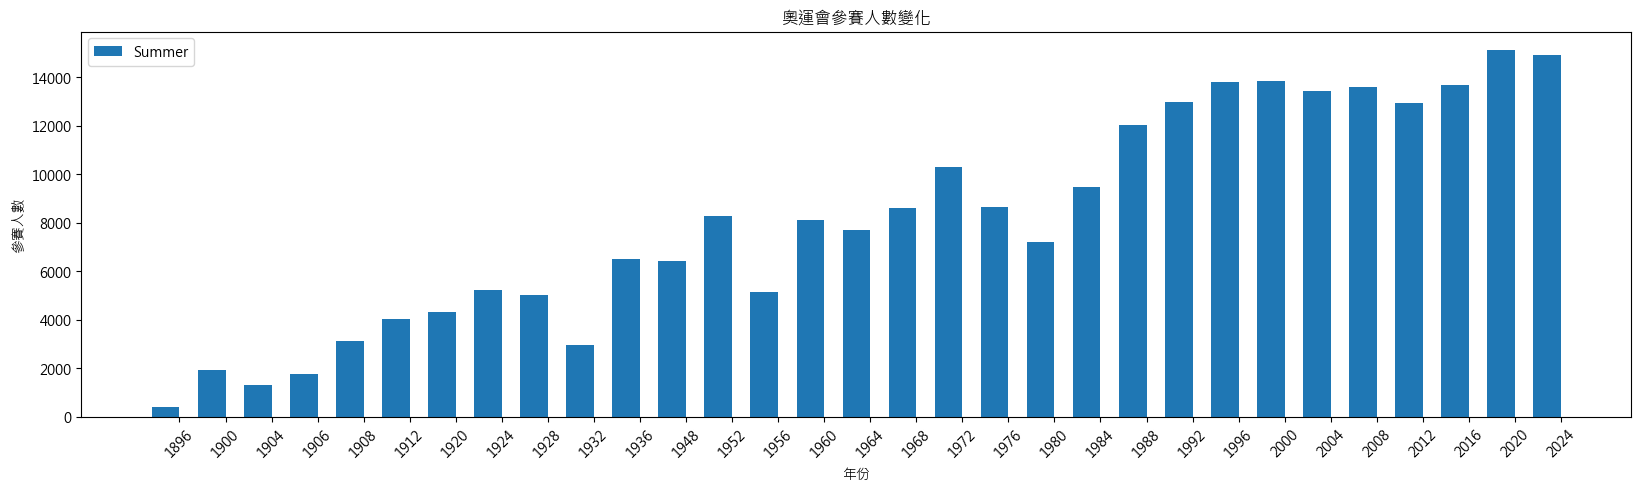

In [30]:
# 繪製奧運會參賽人數變化的柱狀圖
# 計算每年夏季奧運的參賽人數
year_counts = df.groupby(["Year", "Season"]).size().unstack()

# 設置圖表大小
plt.figure(figsize=(20, 5))

# 繪製柱狀圖
bar_width = 0.6
x_labels = year_counts.index
x = np.arange(len(x_labels))

plt.bar(x - bar_width/2, year_counts["Summer"], width=bar_width, label="Summer")

# 設置 x 軸標籤
plt.xticks(ticks=x, labels=x_labels, rotation=45)
plt.legend(loc='upper left')
plt.title("奧運會參賽人數變化")
plt.xlabel("年份")
plt.ylabel("參賽人數")

## 男性歷年參賽人數變化

Text(0, 0.5, '參賽人數')

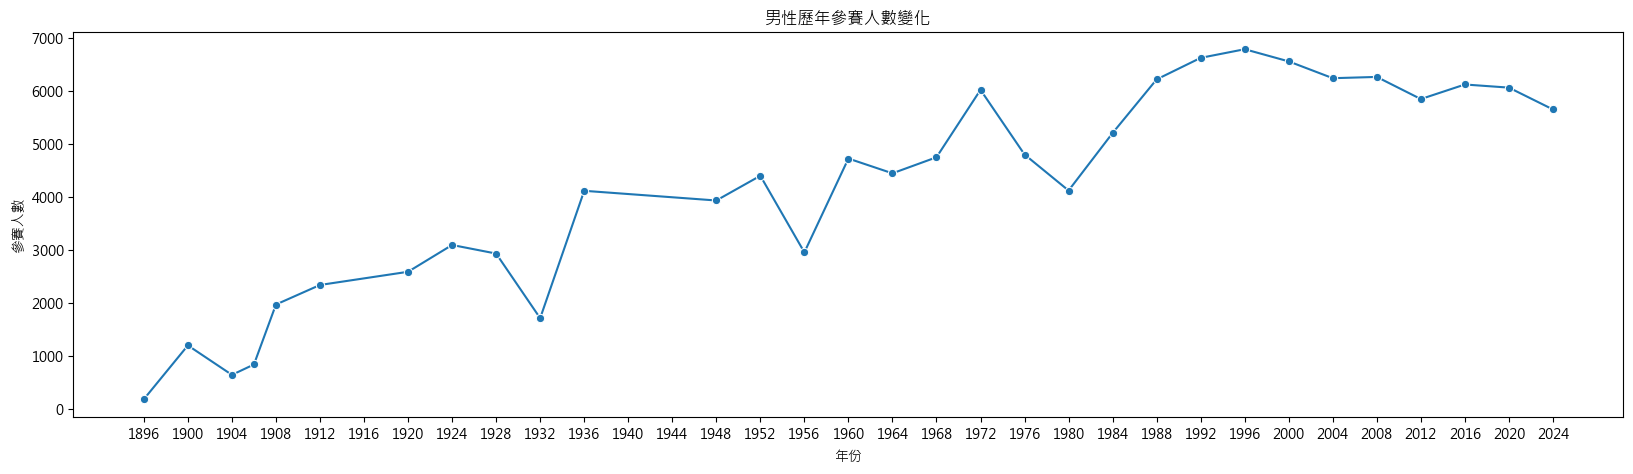

In [31]:
# 篩選出男性運動員
male_data = df[df['Sex'] == 'M']

# 按年份統計男性參賽人數
male_participation = male_data.groupby('Year')['Name'].nunique().reset_index()
male_participation.columns = ['Year', 'Male_Participants']

# 繪製折線圖
plt.figure(figsize=(20, 5))
sns.lineplot(x='Year', y='Male_Participants', data=male_participation, marker='o')
plt.xticks(np.arange(male_participation['Year'].min(), male_participation['Year'].max() + 1, 4))
plt.title("男性歷年參賽人數變化")
plt.xlabel("年份")
plt.ylabel("參賽人數")

## 女性歷年參賽人數變化

Text(0, 0.5, '參賽人數')

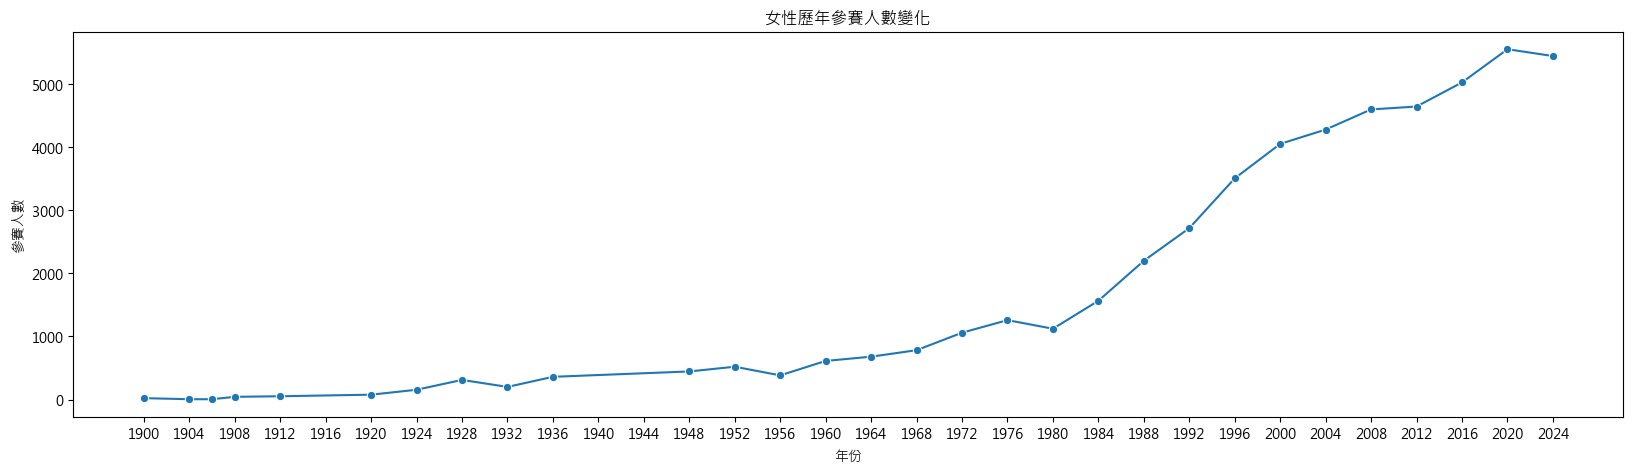

In [32]:
# 篩選出女性運動員
male_data = df[df['Sex'] == 'F']

# 按年份統計女性參賽人數
male_participation = male_data.groupby('Year')['Name'].nunique().reset_index()
male_participation.columns = ['Year', 'Female_Participants']

# 繪製折線圖
plt.figure(figsize=(20, 5))
sns.lineplot(x='Year', y='Female_Participants', data=male_participation, marker='o')
plt.xticks(np.arange(male_participation['Year'].min(), male_participation['Year'].max() + 1, 4))
plt.title("女性歷年參賽人數變化")
plt.xlabel("年份")
plt.ylabel("參賽人數")

## 歷屆奧運會男女比例

Text(0.5, 1.0, '歷屆奧運會男女比例')

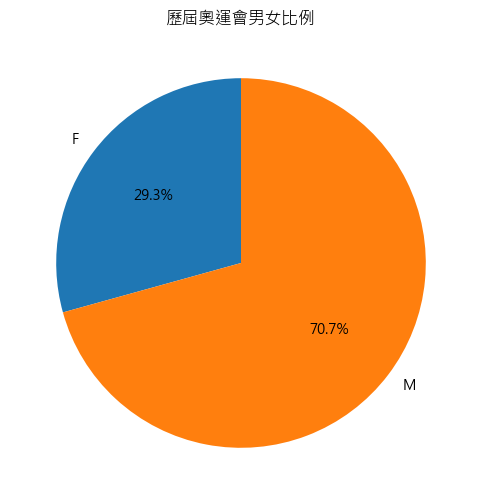

In [33]:
# 計算男女運動員的比例
m_f_ration = df.drop_duplicates()
m_f_ration = m_f_ration.groupby(by="Sex")["Sex"].count()
m_f_ration = m_f_ration / m_f_ration.sum() * 100

# 繪製圓餅圖
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    m_f_ration, labels=m_f_ration.index, autopct='%1.1f%%', 
    startangle=90
)
plt.title("歷屆奧運會男女比例")

## 各運動項目男女運動員數量差異

Males      76
Females    76
dtype: int64


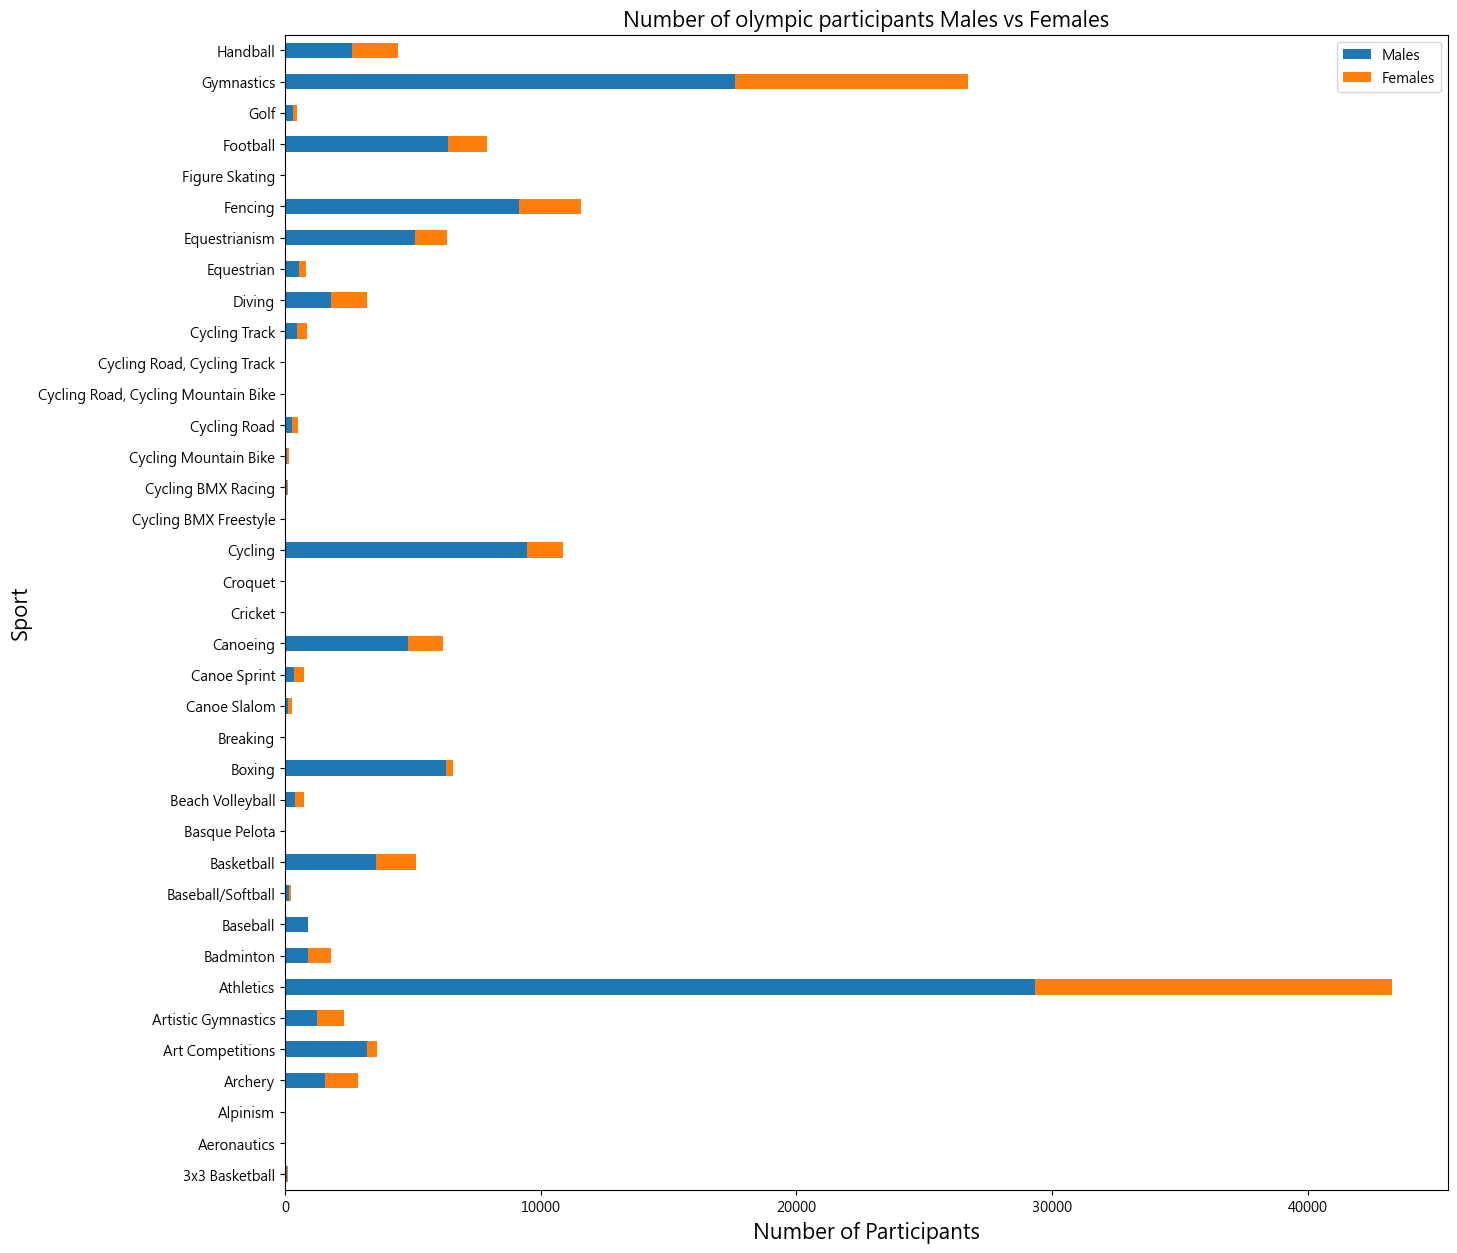

In [34]:
# 繪製各運動項目男女運動員數量差異的柱狀圖

males_cont=df[df['Sex'] == "M"].groupby(['Sport'])['Sport'].count()
females_cont=df[df['Sex'] == "F"].groupby(['Sport'])['Sport'].count()
df_combinedGenderCount=pd.concat([males_cont, females_cont], axis=1)
df_combinedGenderCount.columns=['Males','Females']
df_combinedGenderCount=df_combinedGenderCount.fillna(0)
print(df_combinedGenderCount.count())

ax = df_combinedGenderCount[0:37].plot.barh(stacked=True)
ax.figure.set_size_inches(15,15)
ax.set_xlabel('Number of Participants',fontsize=15)
ax.set_ylabel('Sport',fontsize=15)
ax.set_title("Number of olympic participants Males vs Females",fontsize=15)

ax.legend(loc='upper right')

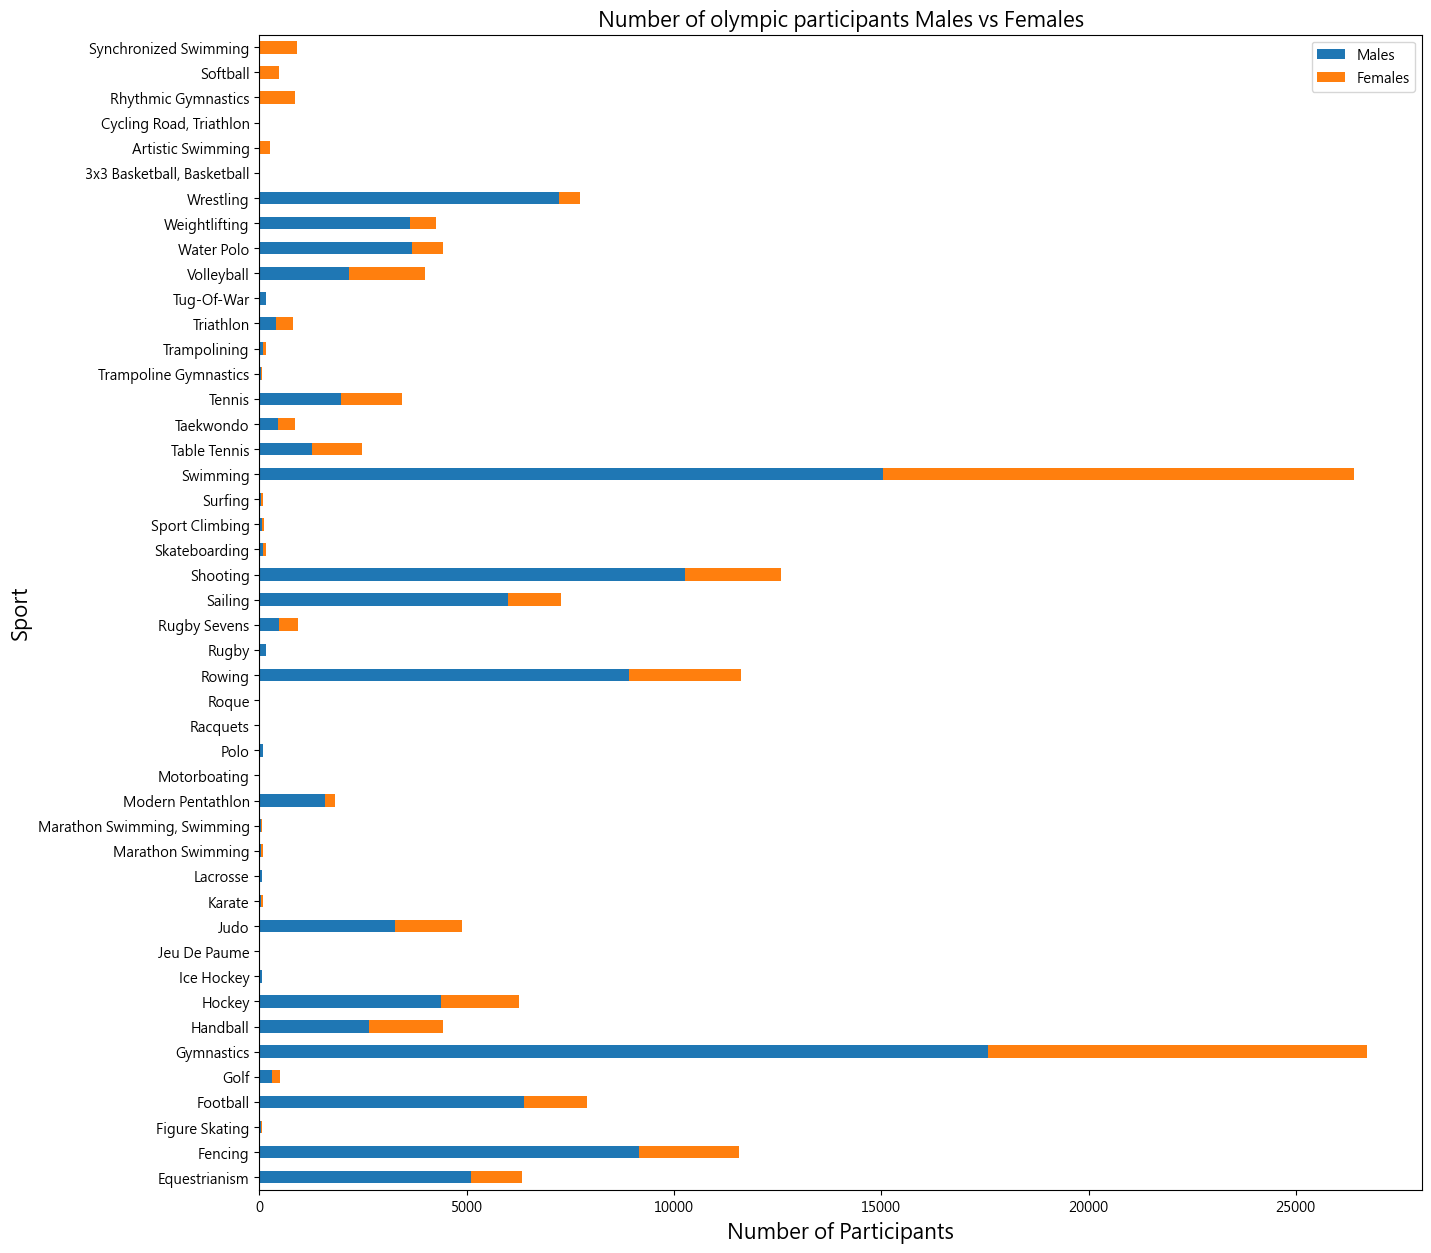

In [35]:
ax = df_combinedGenderCount[30:].plot.barh(stacked=True);
ax.figure.set_size_inches(15,15)
ax.set_xlabel('Number of Participants',fontsize=15)
ax.set_ylabel('Sport',fontsize=15)
ax.set_title("Number of olympic participants Males vs Females",fontsize=15)
ax.legend(loc='upper right')

## 奧運會運動員年齡

In [36]:
# 查看奧運會運動員年齡的分佈情況
#奧運會運動員年齡
age_distribute=df.dropna(subset=['Age'])
age_distribute.Age.describe()

count    252565.000000
mean         25.662534
std           6.299428
min          10.000000
25%          22.000000
50%          25.000000
75%          28.000000
max          97.000000
Name: Age, dtype: float64

In [37]:
# 查看各個項目中年齡小於18歲的運動員數量
df[df.Age<18].Sport.value_counts()[:5]

Swimming               5009
Gymnastics             3823
Athletics               553
Diving                  342
Rhythmic Gymnastics     221
Name: Sport, dtype: int64

Text(0.5, 1.0, '運動員年齡分佈')

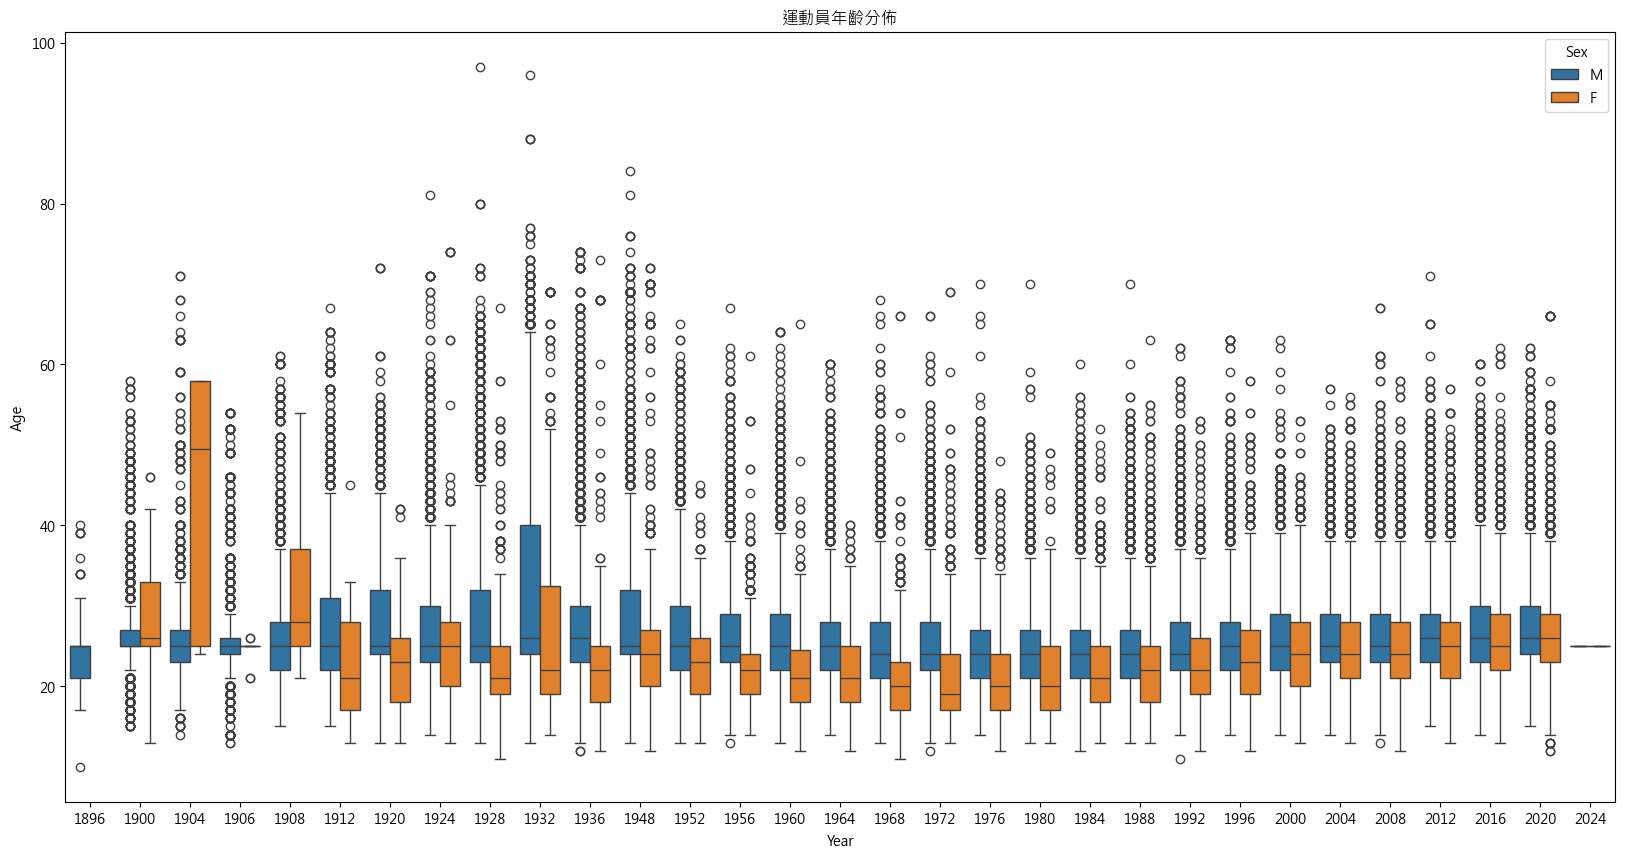

In [38]:
# 設置字體和圖表大小
plt.figure(figsize=(20, 10))

# 繪製箱線圖
sns.boxplot(x='Year', y='Age', hue='Sex', data=df)
plt.title('運動員年齡分佈')

## 運動員身高體重

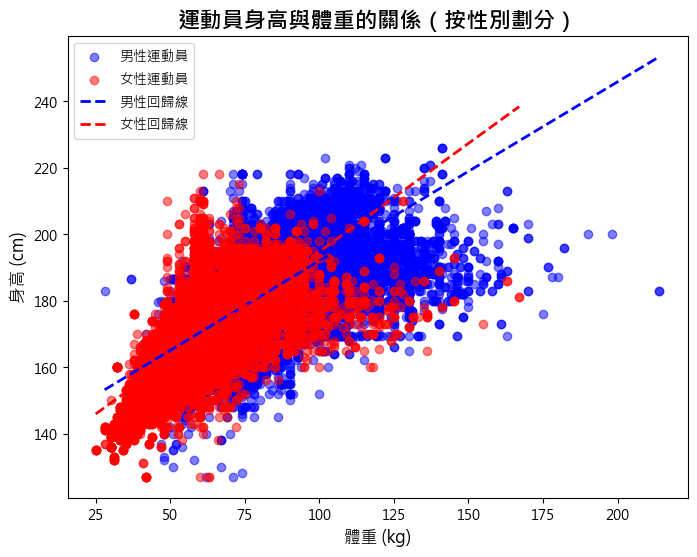

In [39]:
# 設置圖表大小
plt.figure(figsize=(8, 6))

# 分別繪製男性和女性的散點圖
# 假設 df 中有一個名為 'Sex' 的列，包含 'M' 和 'F'
male_data = df[df['Sex'] == 'M']
female_data = df[df['Sex'] == 'F']

# 繪製男性運動員的散點圖
plt.scatter(male_data['Weight'], male_data['Height'], color='blue', alpha=0.5, label='男性運動員')

# 繪製女性運動員的散點圖
plt.scatter(female_data['Weight'], female_data['Height'], color='red', alpha=0.5, label='女性運動員')

# 分別計算男性和女性的回歸線
# 男性回歸線
male_coefficients = np.polyfit(male_data['Weight'], male_data['Height'], 1)
male_poly_eqn = np.poly1d(male_coefficients)
male_x_range = np.linspace(male_data['Weight'].min(), male_data['Weight'].max(), 100)
male_y_range = male_poly_eqn(male_x_range)

# 女性回歸線
female_coefficients = np.polyfit(female_data['Weight'], female_data['Height'], 1)
female_poly_eqn = np.poly1d(female_coefficients)
female_x_range = np.linspace(female_data['Weight'].min(), female_data['Weight'].max(), 100)
female_y_range = female_poly_eqn(female_x_range)

# 繪製男性回歸線
plt.plot(male_x_range, male_y_range, color='blue', linewidth=2, linestyle='--', label='男性回歸線')

# 繪製女性回歸線
plt.plot(female_x_range, female_y_range, color='red', linewidth=2, linestyle='--', label='女性回歸線')

# 添加標題和坐標軸標籤
plt.title('運動員身高與體重的關係（按性別劃分）', fontsize=16, fontweight='bold')
plt.xlabel('體重 (kg)', fontsize=12)
plt.ylabel('身高 (cm)', fontsize=12)

# 設置坐標軸刻度標籤的字體大小
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# 添加圖例
plt.legend(fontsize=10)



In [40]:
# 觀察身高和體重的線性關係
# 計算身高和體重的相關係數
df[['Weight','Height']].corr()

,Weight,Height
Weight,1.000000,0.778518
Height,0.778518,1.000000


Text(0.5, 1.0, '運動員體重變化')

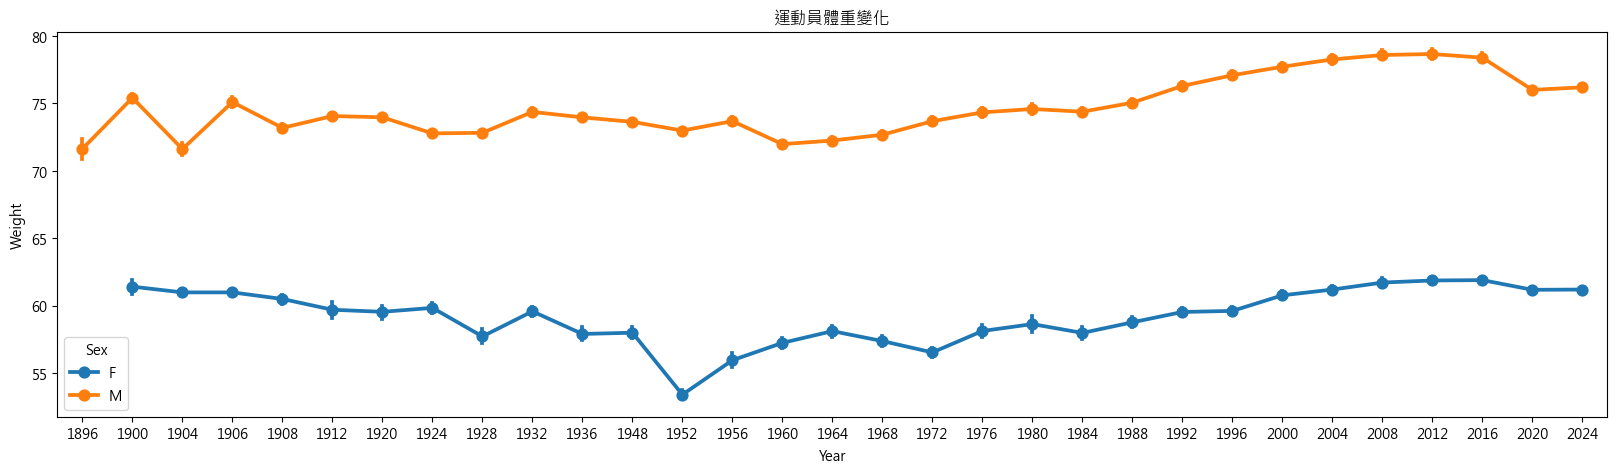

In [41]:
# 查看這些年運動員的體重變化
# 篩選出夏季奧運會的數據
tmp1 = df[df['Season'] == 'Summer']

# 確保 Sex 列是分類變數
tmp1['Sex'] = tmp1['Sex'].astype('category')

# 繪製點圖
plt.figure(figsize=(20, 5))
sns.pointplot(x='Year', y='Weight', data=tmp1, hue='Sex')
plt.title('運動員體重變化')

Text(0.5, 1.0, '運動員身高變化')

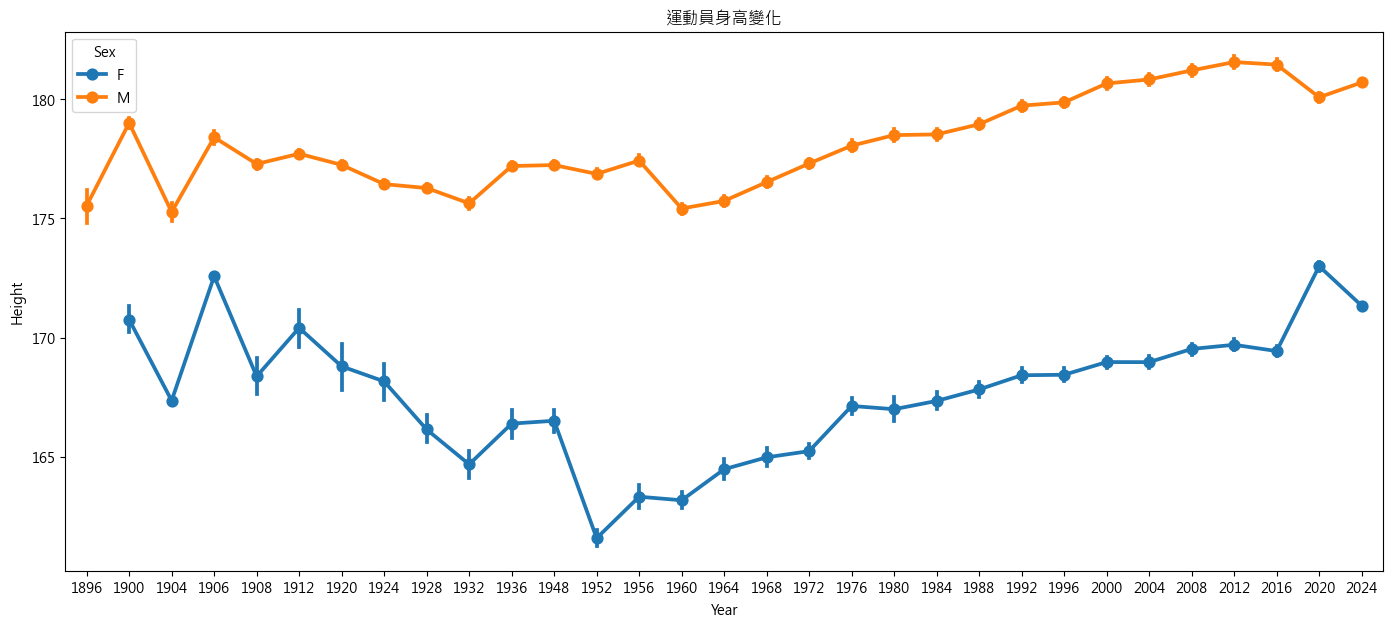

In [42]:
# 查看這些年運動員的身高變化
# 篩選出夏季奧運會的數據
tmp2 = df[df['Season'] == 'Summer']

# 確保 Sex 列是分類變數
tmp2['Sex'] = tmp2['Sex'].astype('category')

# 繪製點圖
plt.figure(figsize=(17, 7))
sns.pointplot(x='Year', y='Height', data=tmp2, hue='Sex')
plt.title('運動員身高變化')

C:\Users\User\AppData\Local\Temp\ipykernel_66680\1549802353.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Height"], kde=True)


<Axes: xlabel='Height', ylabel='Density'>

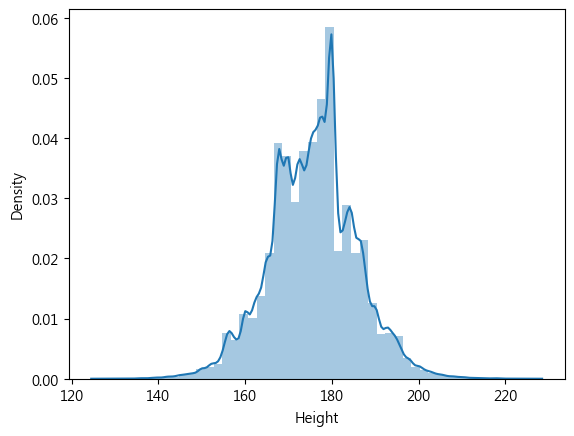

In [43]:
# 繪製身高分佈長條圖
sns.distplot(df["Height"], kde=True)

<Axes: ylabel='Height'>

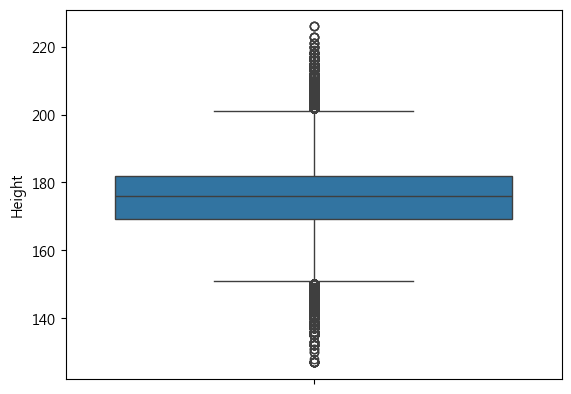

In [44]:
# 繪製身高箱線圖
sns.boxplot(df["Height"])

In [45]:
# 篩選出獲得金牌的運動員
temp = df[df['Medal'] == 'Gold']

# 按運動員分組並計算金牌數量
athlete = temp.groupby(['Name'])['Medal'].count().reset_index()
athlete.columns = ['Name', 'Nums']
athlete = athlete.sort_values(by="Nums", ascending=False)

# 選擇獲得金牌數量最多的前10名運動員
top_10_athletes = athlete.head(10)

# 創建 PictorialBar 圖表
pb = (
    PictorialBar(init_opts=opts.InitOpts(bg_color='lavender', width='1000px', height='750px'))
    .add_xaxis([x.replace(' ', '\n') for x in top_10_athletes['Name'].tolist()])
    .add_yaxis(
        "",
        top_10_athletes['Nums'].tolist(),
        label_opts=opts.LabelOpts(is_show=False),
        symbol_size=26,
        symbol_repeat='fixed',
        symbol_offset=[0, 0],
        is_symbol_clip=True,
        symbol='image://https://cdn.kesci.com/upload/image/q8f8otrlfc.png'  # 替換為有效的圖片連結
    )
    .reversal_axis()
    .set_global_opts(
        title_opts=opts.TitleOpts(
            title="獲得金牌數量最多的運動員",
            pos_left='center',
            title_textstyle_opts=opts.TextStyleOpts(color="black", font_size=20)
        ),
        xaxis_opts=opts.AxisOpts(is_show=False),
        yaxis_opts=opts.AxisOpts(
            axistick_opts=opts.AxisTickOpts(is_show=False),
            axisline_opts=opts.AxisLineOpts(
                linestyle_opts=opts.LineStyleOpts(opacity=0)
            ),
        ),
    )
)

pb.render_notebook()

In [46]:
# 計算獲得獎牌的比例
total_athlete = len(set(df['Name']))
medal_athlete = len(set(df['Name'][df['Medal'].isin(['Gold', 'Silver', 'Bronze'])]))
gold_athlete = len(set(df['Name'][df['Medal'] == 'Gold']))

bl = Liquid(init_opts=opts.InitOpts(theme='dark', width='1000px', height='800px'))
bl.add("獲得獎牌", [medal_athlete / total_athlete],
       label_opts=opts.LabelOpts(font_size=50,
                                 formatter=JsCode(
                                     """function (param) {
                                             return (Math.floor(param.value * 10000) / 100) + '%';
                                         }"""),
                                 position="inside",
                                 ))
bl.set_global_opts(title_opts=opts.TitleOpts(title="獲得過獎牌比例", pos_left='center',pos_top='15%'))
bl.set_series_opts(tooltip_opts=opts.TooltipOpts(is_show=False))
 
grid = Grid().add(bl, grid_opts=opts.GridOpts())
grid.render_notebook()

In [47]:
# 計算獲得金牌的比例
bl = Liquid(init_opts=opts.InitOpts(theme='dark', width='1000px', height='800px'))
bl.add("獲得金牌", [gold_athlete / total_athlete],
       label_opts=opts.LabelOpts(font_size=50,
                                 formatter=JsCode(
                                     """function (param) {
                                             return (Math.floor(param.value * 10000) / 100) + '%';
                                         }"""),
                                 position="inside",
                                 ), )
bl.set_global_opts(title_opts=opts.TitleOpts(title="獲得過金牌比例", pos_left='center',pos_top='15%'))
bl.set_series_opts(tooltip_opts=opts.TooltipOpts(is_show=False))

grid = Grid().add(bl, grid_opts=opts.GridOpts())
grid.render_notebook()

In [93]:
# 獲取各項運動產生金牌數

medal_data = df.groupby(['Year', 'Season', 'region', 'Medal'])['Event'].nunique().reset_index()
medal_data.columns = ['Year', 'Season', 'region', 'Medal', 'Nums']
medal_data = medal_data.sort_values(by="Year", ascending=True)
 
background_color_js = """'white'"""  # 直接設為白色
tab = Tab()
temp = df[(df['Medal'] == 'Gold') & (df['Year'] == 2024) & (df['Season'] == 'Summer')]
 
event_medal = temp.groupby(['Sport'])['Event'].nunique().reset_index()
event_medal.columns = ['Sport', 'Nums']
event_medal = event_medal.sort_values(by="Nums", ascending=False)
 
pie = (Pie(init_opts=opts.InitOpts(bg_color=JsCode(background_color_js), width='1600px', height='800px'))
       .add('金牌', [(row['Sport'], row['Nums']) for _, row in event_medal.iterrows()],
            radius=["35%", "75%"],
            rosetype="radius")
       .set_global_opts(title_opts=opts.TitleOpts(
                                        title="2024年夏季奧運會各項運動產生金牌占比",
                                        pos_left="center",
                                        title_textstyle_opts=opts.TextStyleOpts(color="Black", font_size=20), ),
                                        legend_opts=opts.LegendOpts(is_show=False))
       
       .set_series_opts(label_opts=opts.LabelOpts(
                                        formatter="{b}: {d}%",
                                        position="outside",
                                        font_size=12
                                    ),
                        tooltip_opts=opts.TooltipOpts(trigger="item", formatter="{a} <br/>{b}: {c} ({d}%)"), )
       )
tab.add(pie, '2024年夏奧會')
tab.render("2024_summer_olympics_gold_medal_distribution.html")
tab.render_notebook()

## 美國歷屆奧運會參賽人數

In [49]:
# 篩選出美國的資料
USA_data = df[df.region == 'USA']
USA_data.head()

# 按年份和季節統計美國的參賽人數
athlete = USA_data.groupby(['Year', 'Season'])['Name'].nunique().reset_index()
athlete.columns = ['Year', 'Season', 'Nums']
athlete = athlete.sort_values(by="Year", ascending=False)
 
# 繪製橫條圖
summer_bar = (
    Bar(init_opts=opts.InitOpts(theme='dark', width='1000px', height='300px'))
    .add_xaxis([row['Year'] for _, row in athlete[athlete.Season == 'Summer'].iterrows()])
    .add_yaxis("參賽人數", [row['Nums'] for _, row in athlete[athlete.Season == 'Summer'].iterrows()],
               category_gap='40%',
               itemstyle_opts=opts.ItemStyleOpts(
                   border_color='grey',
                   color=JsCode("""new echarts.graphic.LinearGradient(0, 0, 0, 1, 
                                             [{
                                                 offset: 1,
                                                 color: 'limegreen'
                                             }, {
                                                 offset: 0.8,
                                                 color: 'yellow'
                                             },{
                                                 offset: 0,
                                                 color: 'pink'
                                             }])""")))
    .set_series_opts(label_opts=opts.LabelOpts(is_show=True,
                                               position='top',
                                               font_style='italic'))
    .set_global_opts(
        title_opts=opts.TitleOpts(title="奧運會美國歷年參賽人數", pos_left='center'),
        xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=45)),
        legend_opts=opts.LegendOpts(is_show=False),
        yaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(margin=20, color="#ffffff65")),
        graphic_opts=[
            opts.GraphicImage(
                graphic_item=opts.GraphicItem(
                    right=0, top=0, z=-10, bounding="raw", origin=[75, 75]
                ),
                graphic_imagestyle_opts=opts.GraphicImageStyleOpts(
                    width=1000,
                    height=600,
               ),
            )
        ], ) 
)
 
page = (
    Page()
    .add(summer_bar, )
)
page.render_notebook()

## 美國參賽人數的變化

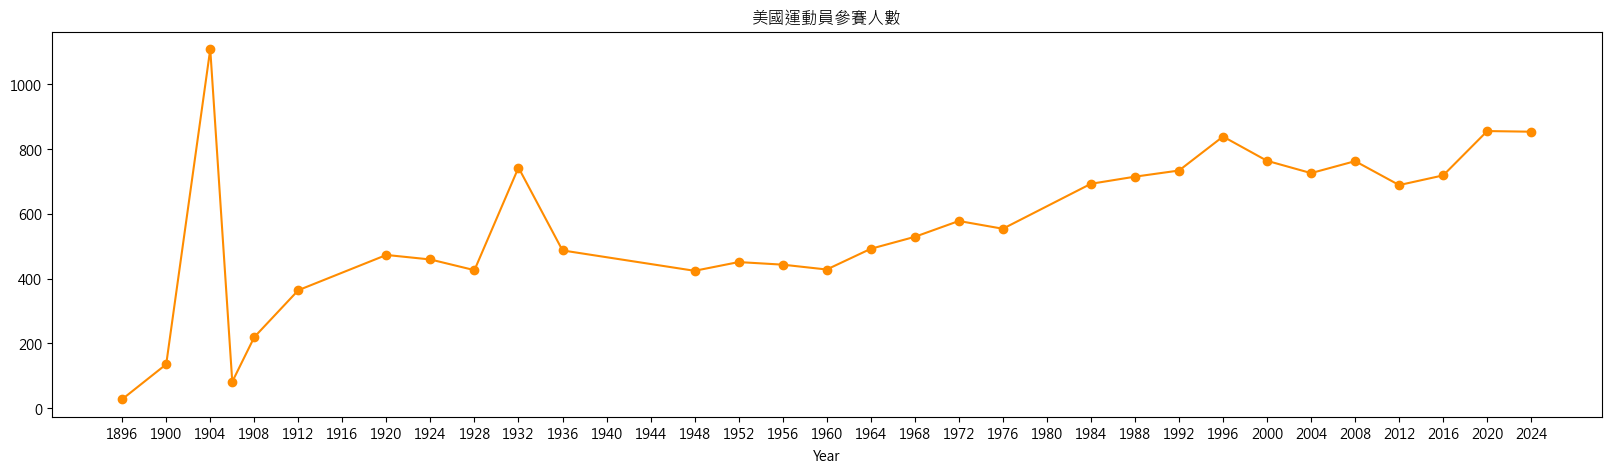

In [50]:
# 篩選出美國的資料並繪製參賽人數的變化趨勢圖
usa=df[df.region=='USA']
tmp = usa[usa.Season=='Summer'].groupby('Year')['ID'].count()
plt.figure(figsize=(20, 5))
plt.xticks(np.arange(1896,2028,4))
tmp.plot(style="-o",color='darkorange')
plt.title("美國運動員參賽人數")
plt.show()

## 美國最強項目

In [51]:
# 繪製漏斗圖展示美國的最強項目

adv_data=df[df["NOC"]=="USA"].groupby(by="Sport")["Medal"].count().to_frame()
adv_data=adv_data.sort_values(by="Medal",ascending=False)[0:10]
sport_name=[str(i) for i in adv_data.index]
sports=[int(j)for j in adv_data.values]

sha = (Funnel().add("", [z for z in zip(sport_name,sports)]))

sha.render_notebook()

In [52]:
# 繪製詞雲圖展示美國的優勢項目
# 篩選出美國的資料
USA_data = df[df['region'] == 'USA']

# 篩選出獲得金牌的項目
CN_events = USA_data[USA_data['Medal'] == 'Gold'].groupby(['Year', 'Sport'])['Event'].nunique().reset_index()
CN_events = CN_events.groupby(['Sport'])['Event'].sum().reset_index()
CN_events.columns = ['Sport', 'Nums']

# 準備數據對
data_pair = [(row['Sport'], row['Nums']) for _, row in CN_events.iterrows()]

# 創建詞雲圖
cy = (
    WordCloud(init_opts=opts.InitOpts(width='1000px', height='600px'))
    .add("", data_pair, word_size_range=[30, 80], shape="circle")  # 設置形狀為圓形
    .set_global_opts(
        title_opts=opts.TitleOpts(
            title="美國獲得過金牌運動項目",
            pos_left="center",
            title_textstyle_opts=opts.TextStyleOpts(font_size=22)
        )
    )
)

cy.render_notebook()